In [1]:
import numpy as np
import pandas as pd
import seaborn as sea

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
raw_data = pd.read_csv('TJ.csv')

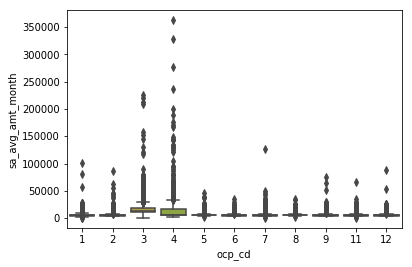

In [3]:
sea.boxplot(x = raw_data['ocp_cd'], y = raw_data['sa_avg_amt_month'])

In [4]:
sum(data['label'])

414.0

In [5]:
def convertToAge(df):
    ages = []
    for i in df['brth_yr']:
        age = 2018-i
        ages.append(age)
    df['brth_yr'] = ages
    df = df.rename(index=str, columns={"brth_yr": "age"})
    print("Finish convertAge")
    return df

In [6]:
def convertMartial(df):
    mars = []
    for i in df['mar_st_cd']:
        if(i == 4):
            mars.append(1)
        else:
            mars.append(i)
    print("Finish convertMatial")
    return mars

In [7]:
data = data.drop(['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cc_avg_freq_month','cc_avg_amt_month','act_strt_dt'], axis = 1)
test = test.drop(['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cc_avg_freq_month','cc_avg_amt_month','act_strt_dt'], axis = 1)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938 entries, 0 to 3937
Data columns (total 20 columns):
ip_id                3938 non-null int64
brth_yr              3938 non-null float64
no_of_dpnd_chl       3938 non-null float64
cis_income           3938 non-null float64
crn_bal              3938 non-null float64
gnd_cd               3938 non-null float64
mar_st_cd            3938 non-null float64
ctf_tp_cd            3938 non-null float64
ocp_cd               3938 non-null int64
sa_avg_freq_month    3602 non-null float64
sa_avg_amt_month     3602 non-null float64
total_use            3602 non-null float64
EDC                  3602 non-null float64
Branch               3602 non-null float64
KPlus                3602 non-null float64
ATM                  3602 non-null float64
CDM                  3602 non-null float64
CorporateConnect     3602 non-null float64
CR                   3602 non-null float64
DR                   3602 non-null float64
dtypes: float64(18), int64(2)
memory 

In [9]:
MedAmtOcp = {}
for i in range(12):
    x = np.median(raw_data[raw_data['ocp_cd'] == i+1]['sa_avg_amt_month'].dropna())
    MedAmtOcp[i+1] = x 
MedFreqOcp = {}
for i in range(12):
    x = np.median(raw_data[raw_data['ocp_cd'] == i+1]['sa_avg_freq_month'].dropna())
    MedFreqOcp[i+1] = x
MedCROcp = {}
for i in range(12):
    x = np.median(raw_data[raw_data['ocp_cd'] == i+1]['CR'].dropna())
    MedCROcp[i+1] = x
MedincomeOcp = {}
for i in range(12):
    MedincomeOcp[i+1] = np.median(raw_data[raw_data['ocp_cd'] == i+1]['cis_income'].dropna())
MaxincomeOcp = {}
for i in range(12):
    MaxincomeOcp[i+1] = np.max(raw_data[raw_data['ocp_cd'] == i+1]['cis_income'].dropna())
MinincomeOcp = {}
for i in range(12):
    MinincomeOcp[i+1]= np.min(raw_data[raw_data['ocp_cd'] == i+1]['cis_income'].dropna())
    

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
def clearNull(df):
    newdf = df.copy()
    for index in df.index:
        if(np.isnan(df['sa_avg_freq_month'][index])):
            temp = MedFreqOcp[df['ocp_cd'][index]]
            newdf['sa_avg_freq_month'][index] = temp
        if(np.isnan(df['sa_avg_amt_month'][index])):
            temp =  MedAmtOcp[df['ocp_cd'][index]]
            newdf['sa_avg_amt_month'][index] = temp
        if(np.isnan(df['CR'][index])):
            temp = MedCROcp[df['ocp_cd'][index]]
            newdf['CR'][index] = temp
    print("Finish ClearNULL")
    return newdf

In [11]:
def scoreIncome(df):
    scores = []
    for i in df.iterrows():
        score = (i[1]['cis_income']-MedincomeOcp[i[1]['ocp_cd']])/(MedincomeOcp[i[1]['ocp_cd']])
        scores.append(score)
    print("Finish scoreIncome")
    return scores

In [12]:
data = convertToAge(data)
data['mar_st_cd'] = convertMartial(data)
data['score_income'] = scoreIncome(data)
test = convertToAge(test)
test['mar_st_cd'] = convertMartial(test)
test = clearNull(test)
test['score_income'] = scoreIncome(test)

Finish convertAge
Finish convertMatial
Finish scoreIncome
Finish convertAge
Finish convertMatial


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Finish ClearNULL
Finish scoreIncome


In [13]:
print(data['score_income'][1])
data.columns

0.2895981439067194


Index(['ip_id', 'label', 'age', 'no_of_dpnd_chl', 'cis_income', 'crn_bal',
       'gnd_cd', 'mar_st_cd', 'ctf_tp_cd', 'ocp_cd', 'sa_avg_freq_month',
       'sa_avg_amt_month', 'total_use', 'EDC', 'Branch', 'KPlus', 'ATM', 'CDM',
       'CorporateConnect', 'CR', 'DR', 'score_income'],
      dtype='object')

In [14]:
data['CR'] = data['CR']/100
test['CR'] = test['CR']/100

In [85]:
data.head()

,ip_id,label,age,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd,...,total_use,EDC,Branch,KPlus,ATM,CDM,CorporateConnect,CR,DR,score_income
0,1,0.0,28.0,0.0,45864.0,876428.0,2.0,2.0,3.0,9,...,42.0,7.0,19.0,21.0,16.0,16.0,19.0,0.50,50.0,0.067089
1,2,0.0,32.0,1.0,43355.0,540649.0,2.0,2.0,1.0,3,...,41.0,7.0,17.0,24.0,12.0,17.0,21.0,0.46,53.0,0.289598
2,3,0.0,35.0,0.0,48836.0,310503.0,2.0,2.0,2.0,12,...,42.0,4.0,23.0,21.0,21.0,2.0,26.0,0.40,59.0,0.147651
3,4,0.0,34.0,0.0,44397.0,34209.0,2.0,2.0,5.0,11,...,34.0,14.0,14.0,23.0,17.0,11.0,17.0,0.47,52.0,0.039986
4,5,0.0,32.0,1.0,43281.0,39963.0,2.0,3.0,6.0,9,...,36.0,19.0,22.0,19.0,25.0,11.0,2.0,0.44,55.0,0.006992


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [99]:
clf = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(max_depth=10)
knn = KNeighborsClassifier()

In [100]:
features = data[['score_income']]
label = data['label']

train_x, test_x, train_y, test_y = train_test_split(features,label, test_size = 0.1, random_state = 42)

In [102]:
clf.fit(features,label)
dtc.fit(features,label)
rf.fit(features,label)
knn.fit(features,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [103]:
print(clf.score(test_x,test_y))
print(dtc.score(test_x,test_y))
print(rf.score(test_x,test_y))
print(knn.score(test_x,test_y))

0.9309262166405023
0.967032967032967
0.9623233908948194
0.9560439560439561


In [104]:
feature_test = test[['score_income']]

In [105]:
clf.predict_proba(feature_test)
dtc.predict_proba(feature_test)
rf.predict_proba(feature_test)

array([[0.98622563, 0.01377437],
       [0.98926973, 0.01073027],
       [0.98721749, 0.01278251],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [110]:
ans = pd.DataFrame(dtc.predict_proba(feature_test))[1]

In [111]:
len(ans[ans<0.5])

1728

In [97]:
ans.to_csv('TJ2018-AUDITION-[10558].csv', header= False, index= False)